# <center>IPL Data Analysis</center>

# Problem Statement

- This problem consist of data related to ipl matches across various seasons downloaded from kaggle consisting of features like matchid, teams played, season, winner, man of the match etc. 
- The task is to analyse the ipl data and make various inferences based on different features.

# Dataset

- Dataset can be downloaded from the following link https://www.kaggle.com/kvlsarada/ipl-dataset

In [1]:
# importing necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset

df = pd.read_csv("matches.csv")

In [3]:
# exploring the dataset

df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
# shape of the dataset

df.shape

(636, 18)

- This dataset contain 18 columns and 636 rows.

In [5]:
# finding missing values across various columns

for i in df.columns:
    print(i," => ",df[i].isna().sum())

id  =>  0
season  =>  0
city  =>  7
date  =>  0
team1  =>  0
team2  =>  0
toss_winner  =>  0
toss_decision  =>  0
result  =>  0
dl_applied  =>  0
winner  =>  3
win_by_runs  =>  0
win_by_wickets  =>  0
player_of_match  =>  3
venue  =>  0
umpire1  =>  1
umpire2  =>  1
umpire3  =>  636


- As we can see that umpire3 column doesn't contain any record for any match.
- So we can simply remove this particular column.

In [6]:
# dropping column umpire3 from the dataframe

df.drop(columns = 'umpire3', inplace = True)

In [7]:
# Exploring the dataset again

df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


- We have successfully deleted umpire3 column.

In [8]:
# Now we will again check for missing values in the each column

for i in df.columns:
    print(i," => ",df[i].isna().sum())

id  =>  0
season  =>  0
city  =>  7
date  =>  0
team1  =>  0
team2  =>  0
toss_winner  =>  0
toss_decision  =>  0
result  =>  0
dl_applied  =>  0
winner  =>  3
win_by_runs  =>  0
win_by_wickets  =>  0
player_of_match  =>  3
venue  =>  0
umpire1  =>  1
umpire2  =>  1


- Now we can see that there are very less missing values. So we can simply remove rows containg missing values.

In [9]:
# removing rows containing missing values

df.dropna(inplace = True)

In [10]:
# again checking for missing values

for i in df.columns:
    print(i," => ",df[i].isna().sum())

id  =>  0
season  =>  0
city  =>  0
date  =>  0
team1  =>  0
team2  =>  0
toss_winner  =>  0
toss_decision  =>  0
result  =>  0
dl_applied  =>  0
winner  =>  0
win_by_runs  =>  0
win_by_wickets  =>  0
player_of_match  =>  0
venue  =>  0
umpire1  =>  0
umpire2  =>  0


- Now there are no missing values in our dataset. 

In [11]:
# shape of the dataset

df.shape

(625, 17)

- After all the missing value analysis, there are 17 columns and 625 rows on top of which we will perform our analysis.

In [12]:
# exploring the dataset again

df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong


- Now we will try to answer few questions with the help of visualizations

#### Q1. Which team has won the maximum number of matches ???

- To answer this question we will plot a bar graph

In [13]:
# making a separate list of winning team

win_team = []
for i in df['winner']:
    if i not in win_team:
        win_team.append(i)
print(win_team)

['Sunrisers Hyderabad', 'Rising Pune Supergiant', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Mumbai Indians', 'Delhi Daredevils', 'Gujarat Lions', 'Royal Challengers Bangalore', 'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants']


In [14]:
# making a dictionary of team and their number of wins

win_team_count = {}
for i in win_team:
    win = 0
    for j in df['winner']:
        if i==j:
            win += 1
    win_team_count[i] = win

In [15]:
# having a look on the win_team_count

win_count = []
for k,v in win_team_count.items():
    print(k," => ",v)
    win_count.append(v)

Sunrisers Hyderabad  =>  40
Rising Pune Supergiant  =>  10
Kolkata Knight Riders  =>  77
Kings XI Punjab  =>  69
Mumbai Indians  =>  92
Delhi Daredevils  =>  61
Gujarat Lions  =>  13
Royal Challengers Bangalore  =>  71
Chennai Super Kings  =>  77
Rajasthan Royals  =>  63
Deccan Chargers  =>  29
Pune Warriors  =>  12
Kochi Tuskers Kerala  =>  6
Rising Pune Supergiants  =>  5


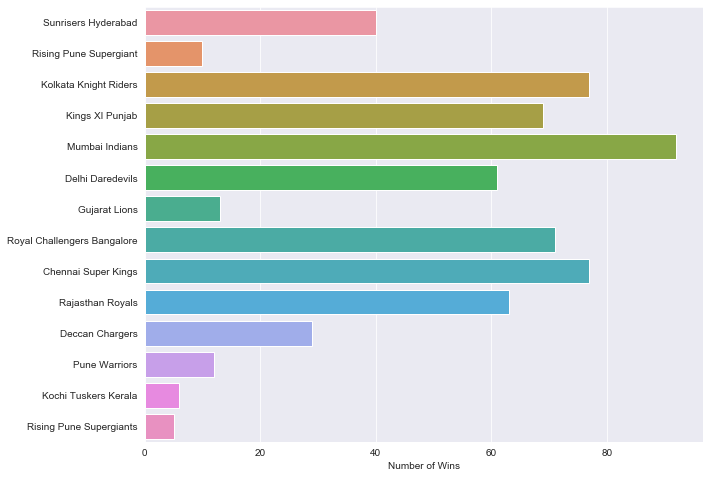

In [16]:
# plotting the bar graph

plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.xlabel("Number of Wins")
sns.barplot(x = win_count, y = win_team);

- So from the above observations we can see that Mumbai Indians has the highest number of wins among all teams which is 92.

#### Q2. What teams mostly prefer after winning the toss - to bat or to field ???

- To answer this question we will use a count plot.

field    357
bat      268
Name: toss_decision, dtype: int64

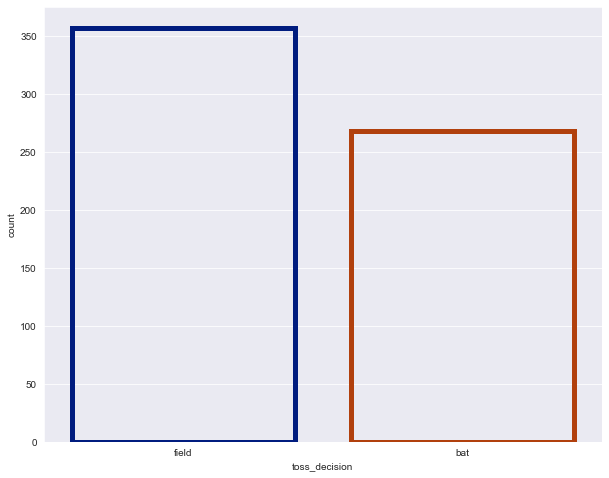

In [17]:
# plotting the count plot

plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot(x = "toss_decision", data = df, facecolor = (0,0,0,0), linewidth = 5, edgecolor = sns.color_palette("dark",3));
df['toss_decision'].value_counts()

- So from the above count plot we can see that the team which wins the toss is most likely to decide to field first.

#### Q3. What is the maximum number of runs from which any team won in an ipl ???

- To answer this question we will use a line plot.

146

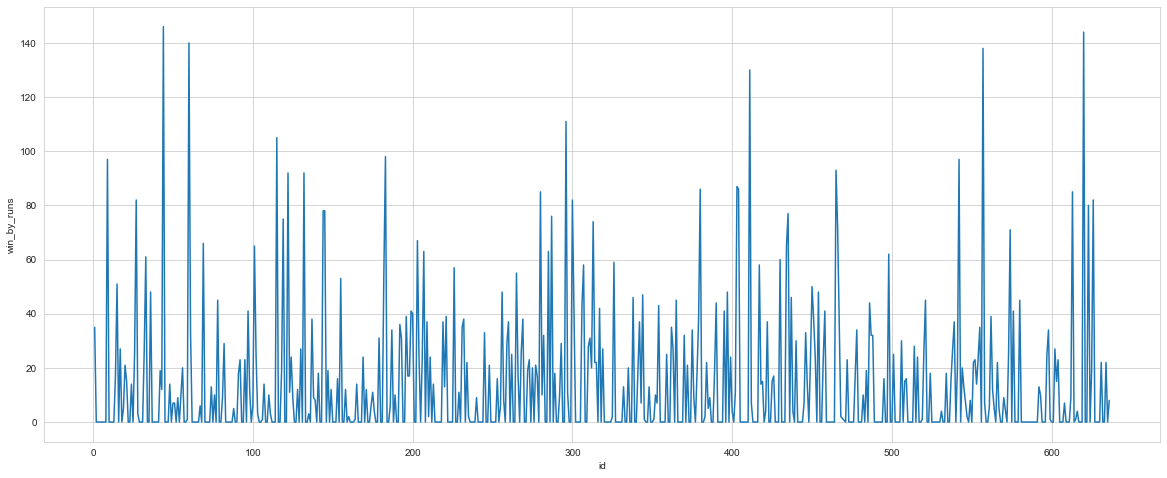

In [18]:
# plotting the line plot

plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data = df, x = "id", y="win_by_runs");
df['win_by_runs'].max()

- Through this line plot we can easily find that the maximum number of runs from which any team won in the ipl is 146.

#### Q4. What is the maximum number of wickets from which any team won in an ipl ???

- It's quite obvious that answer of this question is 10 only but let us visualize it using line graph.

10

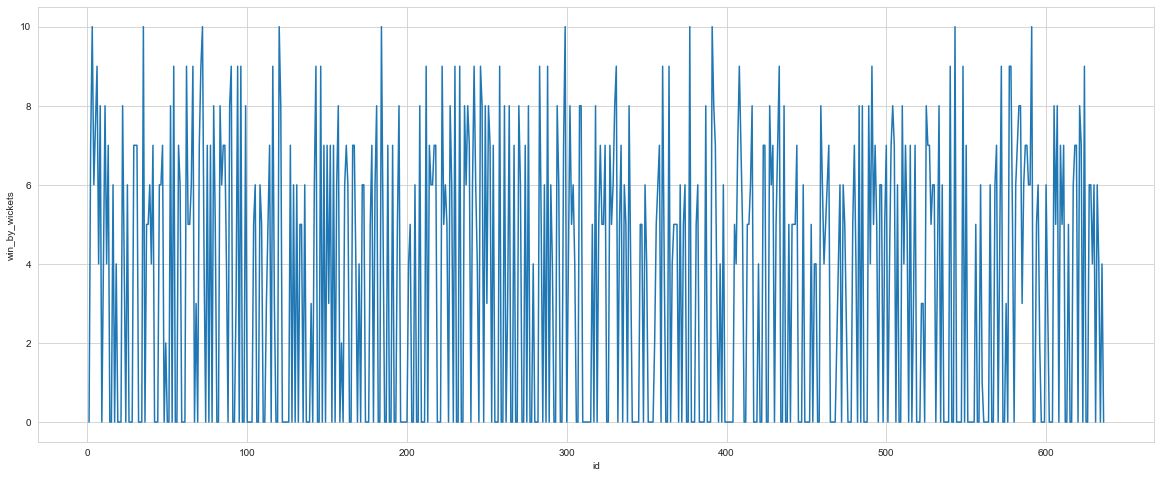

In [19]:
# plotting the line graph

plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
sns.lineplot(data = df, x = "id", y = "win_by_wickets")
df['win_by_wickets'].max()

- As it is already told and now confirmed through line plot that maximum number of wickets through which any team won is obviously 10.

#### Q5. What is the count of matches whose result is normal / tie and if the result is normal than in how many matches Duckworth-Lewis method is applied ???

- To answer this we will use two count plots for the same question.

normal    618
tie         7
Name: result, dtype: int64

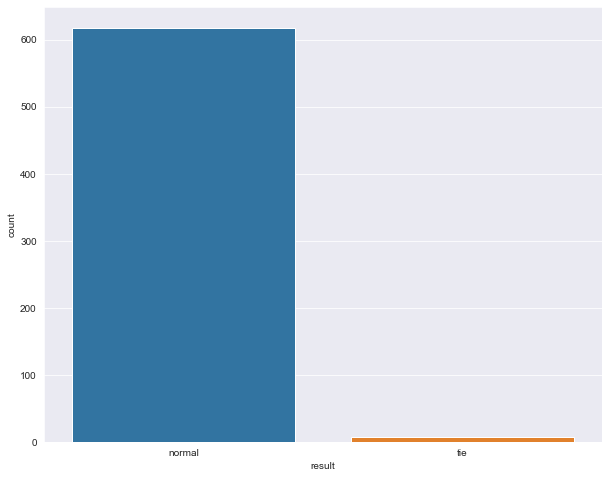

In [29]:
# plotting count plot for finding in how many matches the result is normal / tie

plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot(data = df, x = "result");
df["result"].value_counts()

- Out of all the matches 618 matches have their result as normal i.e. either of the two teams has won but only there are 7 matches in which result is tie.

0    609
1     16
Name: dl_applied, dtype: int64

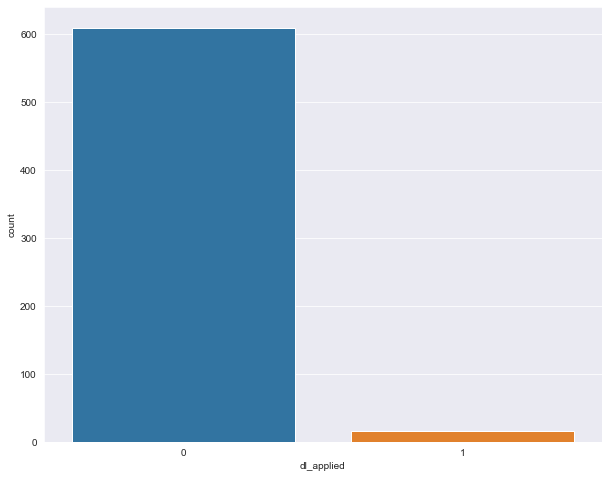

In [35]:
# plotting count plot to find if the result is normal than in how many matches Duckworth-Lewis is applied

plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.countplot(data = df, x = "dl_applied");
df["dl_applied"].value_counts()

- In 16 ipl matches Duckworth-Lewis is applied.

# Conclusion

This notebook contains a thorough analysis on ipl dataset. Some of the questions asked are :-

- Which team has won the maximum number of matches ???
- What teams mostly prefer after winning the toss - to bat or to field ???
- What is the maximum number of runs from which any team won in an ipl ???
- What is the maximum number of wickets from which any team won in an ipl ???
- What is the count of matches whose result is normal / tie and if the result is normal than in how many matches Duckworth-Lewis method is applied ???

Answer of all of these questions is given using graphs and plots which any one can understand easily. 